In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pylab as py
import scipy.stats as sps
import statsmodels.api as sm

In [12]:
def gene_xbar(N): #calculate xbar from exponential 
    x = np.random.exponential(1, N)
    return np.mean(x)

In [13]:
def gene_hist(N, n): #generate histogram
    x_bar = [None]*n
    value = [None]*n
    for i in range(n):
        x_bar[i] = gene_xbar(N)
    pi = 1 #the expetation of exp(lambda) is 1/lambda
    for i in range(n):
        value[i] = (x_bar[i] - 1)*sqrt(N)
    count, bins, ignored = plt.hist(value, bins='auto')
    plt.show()
    return value

In [14]:
def quantile(data, q):
    quantile_point = np.quantile(data, q)
    return quantile_point

In [15]:
def gene_hist_qq(N, n): #generate qq plots, with also histograms
    q = [i*0.01 for i in range(1, 101)] # list all the quantiles, from 0.01~1.0
    mu = 0
    sigma = 1
    dist = sps.norm(loc=mu, scale=sigma)
    q_normal = [dist.ppf(ppf) for ppf in q] #normal distribution
    stats = gene_hist(N, n)
    q_stats = np.quantile(stats, q) #for the 'value'
    plt.scatter(q_normal, q_stats) #draw
    plt.plot([-3, 3], [-3, 3], color = "black") #draw

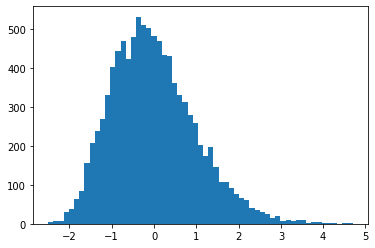

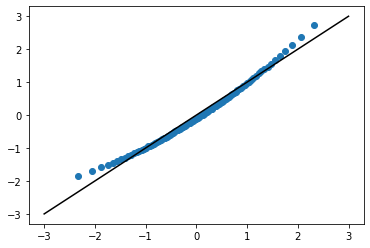

In [16]:
N = 10 #sample size
n = 10000 #copy pieces
gene_hist_qq(N, n)

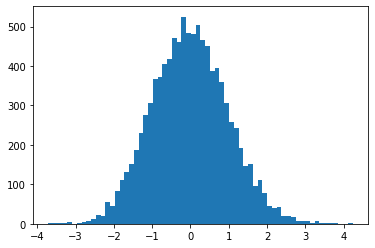

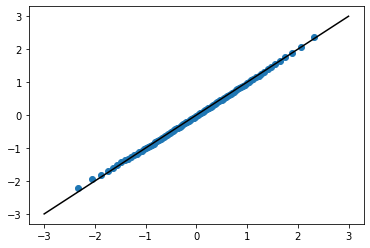

In [ ]:
N = 100 #sample size
n = 10000 #copy pieces
gene_hist_qq(N, n)

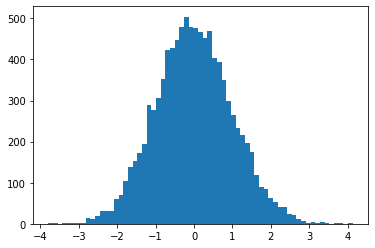

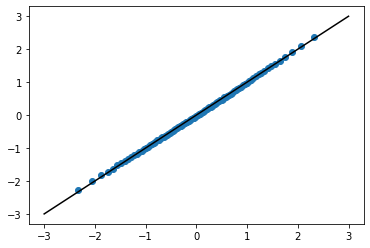

In [ ]:
N = 1000 #sample size
n = 10000 #copy pieces
gene_hist_qq(N, n)

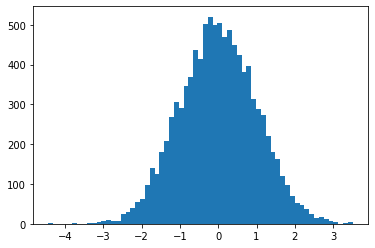

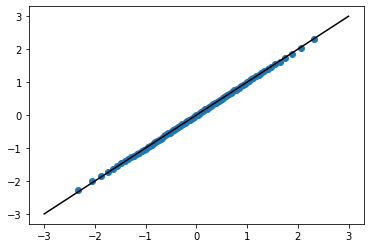

In [ ]:
N = 10000 #sample size
n = 10000 #copy pieces
gene_hist_qq(N, n)

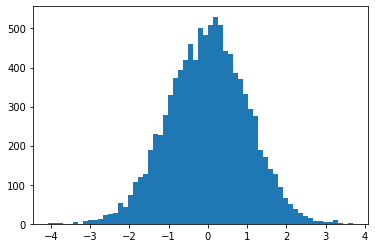

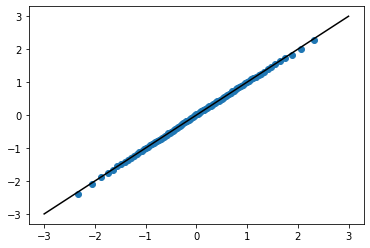

In [ ]:
N = 100000 #sample size
n = 10000 #copy pieces
gene_hist_qq(N, n)

In [2]:
order = 12 #let N be in the form 2^i for i<order
N_lst = [2**n for n in range(order)]
Q_lst = np.zeros(order)
Q_rate = np.zeros(order)
M = 10**6

#calculate the estimator Q_N
def Q_N(N):
  all = np.random.gamma(N, 1/N, M)
  return len(all[all > 1.1])/M


for i in range(len(N_lst)):
  N = N_lst[i]

  #generate M pieces of independent gamma(N, 1/N)
  Q_lst[i] = Q_N(N)

  #calculate rate
  Q_rate[i] = np.log(Q_lst[i])/N

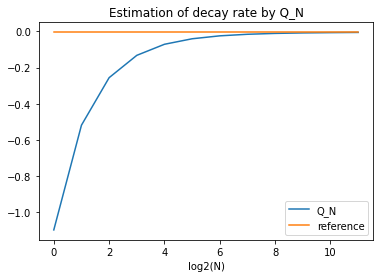

In [3]:
r = -0.1 + np.log(1.1) #the reference from the previous example

order = 12
x = [i for i in range(order)]
ref = [r for i in range(order)]

#plot the rate of decay for reference and Q_N
plt.plot(x, Q_rate, label='Q_N')
plt.plot(x, ref, label='reference')
plt.xlabel('log2(N)')
plt.title('Estimation of decay rate by Q_N')
plt.legend()

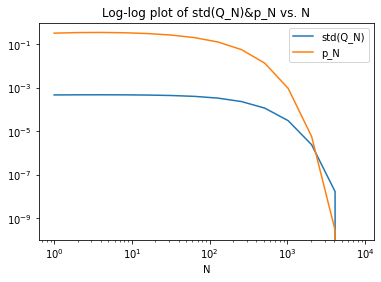

In [11]:
M = 10**6
p_N = lambda N: 1-sps.gamma.cdf(1.1, a = N, scale = 1/N) #function calculating p_N
std_Q_N = lambda N: ((p_N(N)*(1-p_N(N)))/M)**0.5 #function calculating standard deviation of Q_N
order = 14

x = [i for i in range(order)]
N_lst = [2**N for N in range(order)]
Qs = [std_Q_N(n) for n in N_lst]
ps = [p_N(n) for n in N_lst]

#plot the log-log plot
plt.figure()
plt.plot(N_lst,Qs,label='std(Q_N)')
plt.plot(N_lst,ps,label='p_N')
plt.xlabel('N')
plt.xscale('log')
plt.yscale('log')
plt.title('Log-log plot of std(Q_N)&p_N vs. N')
plt.legend()

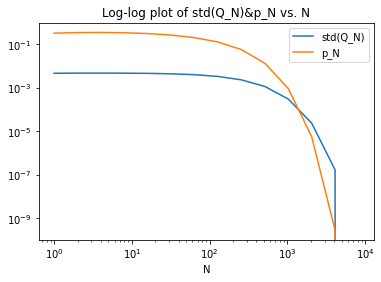

In [6]:
M = 10**4
p_N = lambda N: 1-sps.gamma.cdf(1.1, a = N, scale = 1/N) #function calculating p_N
std_Q_N = lambda N: ((p_N(N)*(1-p_N(N)))/M)**0.5 #function calculating standard deviation of Q_N
order = 14

x = [i for i in range(order)]
N_lst = [2**N for N in range(order)]
Qs = [std_Q_N(n) for n in N_lst]
ps = [p_N(n) for n in N_lst]

#plot the log-log plot
plt.figure()
plt.plot(N_lst,Qs,label='std(Q_N)')
plt.plot(N_lst,ps,label='p_N')
plt.xlabel('N')
plt.xscale('log')
plt.yscale('log')
plt.title('Log-log plot of std(Q_N)&p_N vs. N')
plt.legend()

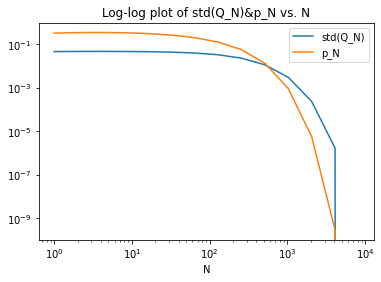

In [8]:
M = 10**2
p_N = lambda N: 1-sps.gamma.cdf(1.1, a = N, scale = 1/N) #function calculating p_N
std_Q_N = lambda N: ((p_N(N)*(1-p_N(N)))/M)**0.5 #function calculating standard deviation of Q_N
order = 14

x = [i for i in range(order)]
N_lst = [2**N for N in range(order)]
Qs = [std_Q_N(n) for n in N_lst]
ps = [p_N(n) for n in N_lst]

#plot the log-log plot
plt.figure()
plt.plot(N_lst,Qs,label='std(Q_N)')
plt.plot(N_lst,ps,label='p_N')
plt.xlabel('N')
plt.xscale('log')
plt.yscale('log')
plt.title('Log-log plot of std(Q_N)&p_N vs. N')
plt.legend()